# Start Here

# Storytelling

### Where Are The Airbnbs Located?

In [22]:
# I want get an idea of where are most of the data are coming from.

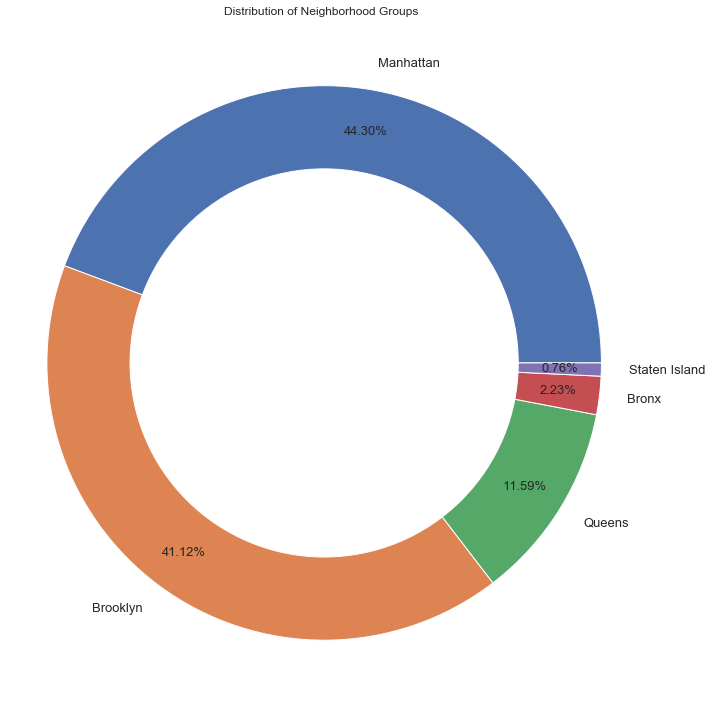

Bronx has 1091 samples.
Brooklyn has 20104 samples.
Manhattan has 21661 samples.
Queens has 5666 samples.
Staten Island has 373 samples.


In [23]:
fig,ax=plt.subplots(figsize=(10,10))
data['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[data['neighbourhood_group'] == x])) + ' samples.')

#### Looking at this pie/donut chart, we can see that most of our data are located in Manhattan and Brooklyn, some in Queens and very few in Bronx and Staten Island.

### What Is The Proportion of Room Type in The 5 NY City Boroughs?

In [24]:
# Just storing this for future use
ny_boroughs = data['neighbourhood_group'].sort_values().unique()
print(ny_boroughs)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


In [25]:
# Again, just storing this for future use
room_types = data['room_type'].sort_values().unique()
print(room_types)

['Entire home/apt' 'Private room' 'Shared room']


In [26]:
# I want to display the distribution of room type for each NY City Boroughs

#Building a dictionary for the bar chart
room_type_bar = {}
for y in room_types:
    temp_list = []
    for x in ny_boroughs:
        temp_list.append(data.room_type[data['neighbourhood_group'] == x].value_counts()[y])
    room_type_bar[y]=temp_list

room_type_bar

{'Entire home/apt': [379, 9559, 13199, 2096, 176],
 'Private room': [652, 10132, 7982, 3372, 188],
 'Shared room': [60, 413, 480, 198, 9]}

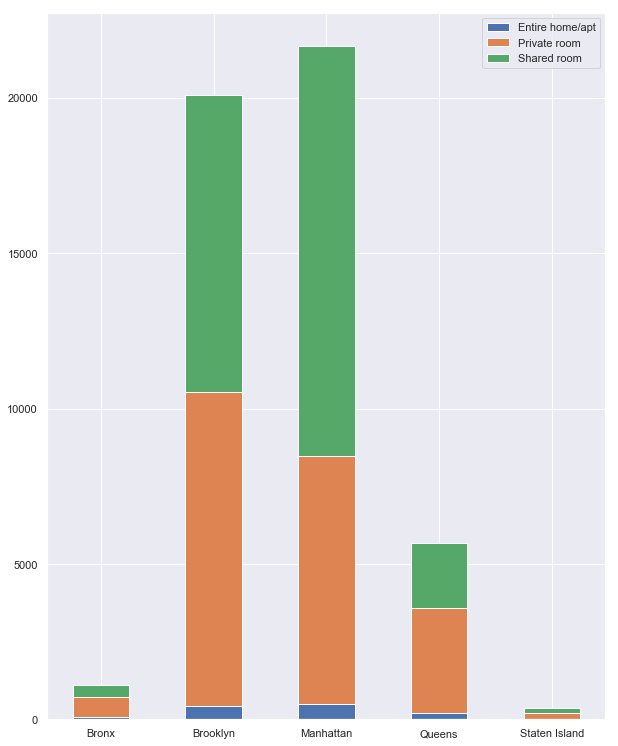

In [27]:
r = np.arange(5)
bars1 = room_type_bar['Shared room']
bars2 = room_type_bar['Private room']
bars3 = room_type_bar['Entire home/apt']
bars = np.add(bars1, bars2).tolist()

fig, ax = plt.subplots(figsize=(10,13))
ax.bar(r, bars1, edgecolor='white', width=.5)
ax.bar(r, bars2, bottom=bars1, edgecolor='white', width=.5)
ax.bar(r, bars3, bottom=bars, edgecolor='white', width=.5)

plt.xticks(r, ny_boroughs)
plt.legend(room_types)
plt.show()

#### This barchart would have been really nice if there isn't a disproportion of the most data(Manhattan & Brooklyn), and the fewest data(Bronx & Staten Island)
#### Overall, most common type of accomodation are private room and shared room.

##### Adding new insight after I produced a few more visualizations below. I noticed that Manhattan is the only borough that offer more shared room than private room, and the explanation could be because Manhattan is so much more expensive than the other boroughs, the demand for shared room is high.

### What is the pricing for each neighborhood group?

C:\Users\KinCodingLaptop\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


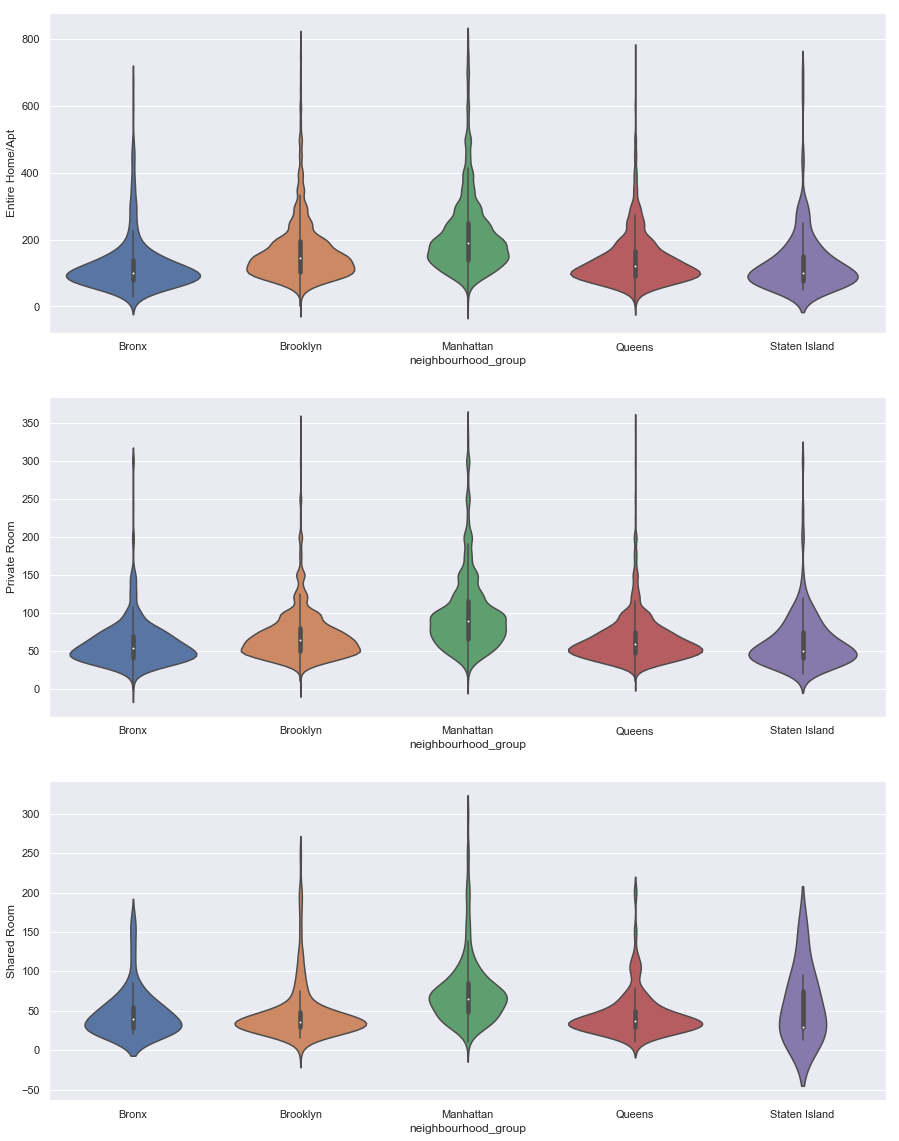

In [28]:
# From now on, I will frequently refer the room type as follow:
# eh = Entire home/apt
# pr = Private Room
# sr = Shared Room

# I have set visualized a few price points and this is a level option that will show most of the distribution of price
data_eh = data[(data['room_type'] == 'Entire home/apt') & (data['price'] < 800)].sort_values('neighbourhood_group')
data_pr = data[(data['room_type'] == 'Private room') & (data['price'] < 350)].sort_values('neighbourhood_group')
data_sr = data[(data['room_type'] == 'Shared room') & (data['price'] < 300)].sort_values('neighbourhood_group')

fig, ax = plt.subplots(nrows=3, figsize=(15,20))

violin_eh=sns.violinplot(data=data_eh, x='neighbourhood_group', y='price', ax=ax[0])
violin_pr=sns.violinplot(data=data_pr, x='neighbourhood_group', y='price', ax=ax[1])
violin_sr=sns.violinplot(data=data_sr, x='neighbourhood_group', y='price', ax=ax[2])

ax[0].set_ylabel('Entire Home/Apt')
ax[1].set_ylabel('Private Room')
ax[2].set_ylabel('Shared Room')

plt.show()

#### A boxplot seem to be easier to read, but this violin plot contains a lot more information.
#### Clearly, Manhattan is the most expensive borough.

##### Just crossed my mind that after placing a price limit, how does that affect the borough proportion on my data?

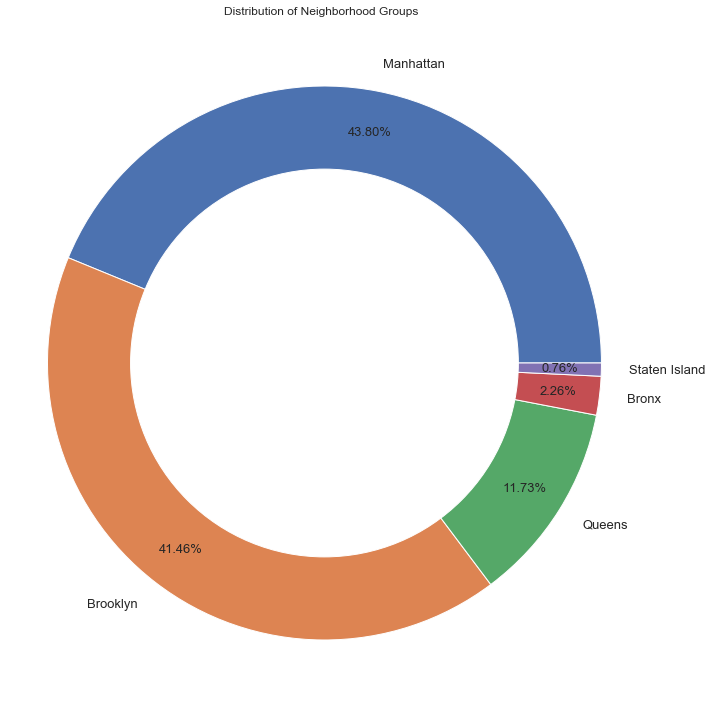

Bronx has 1086 samples.
Brooklyn has 19947 samples.
Manhattan has 21073 samples.
Queens has 5644 samples.
Staten Island has 367 samples.


In [29]:
# Rerunning my pie chart with price limit $600.00

fig,ax=plt.subplots(figsize=(10,10))
data[data['price'] <= 600]['neighbourhood_group'].value_counts().plot.pie(pctdistance=0.85,autopct='%1.2f%%', textprops={'fontsize': 13})
ax.set_title('Distribution of Neighborhood Groups')
ax.set_ylabel('')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()


for x in data[data['price'] <= 600]['neighbourhood_group'].sort_values().unique():
    print(x + ' has '+ str(len(data[(data['neighbourhood_group'] == x) & (data['price'] <= 600)])) + ' samples.')

#### The pie chart did not change much even after I imposed a $600.00 ceiling on the Airbnb price.

## What is the room type distribution like on the map?

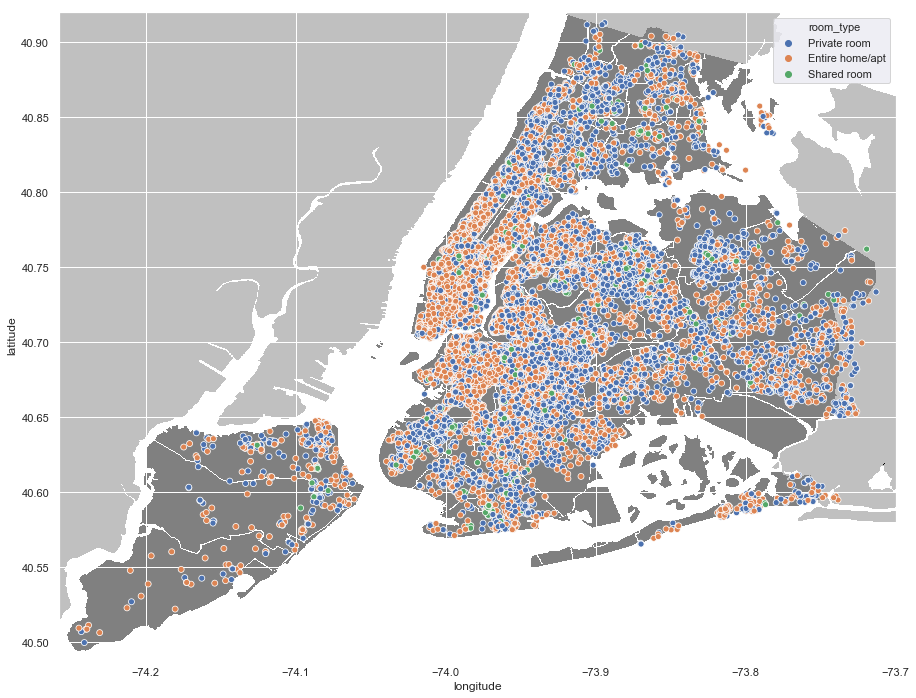

In [30]:
import urllib

plt.figure(figsize=(15,12))

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

sns.scatterplot(data.longitude,data.latitude,hue=data.room_type, ax=ax)

plt.show()

## What is the price distribution like on the map?

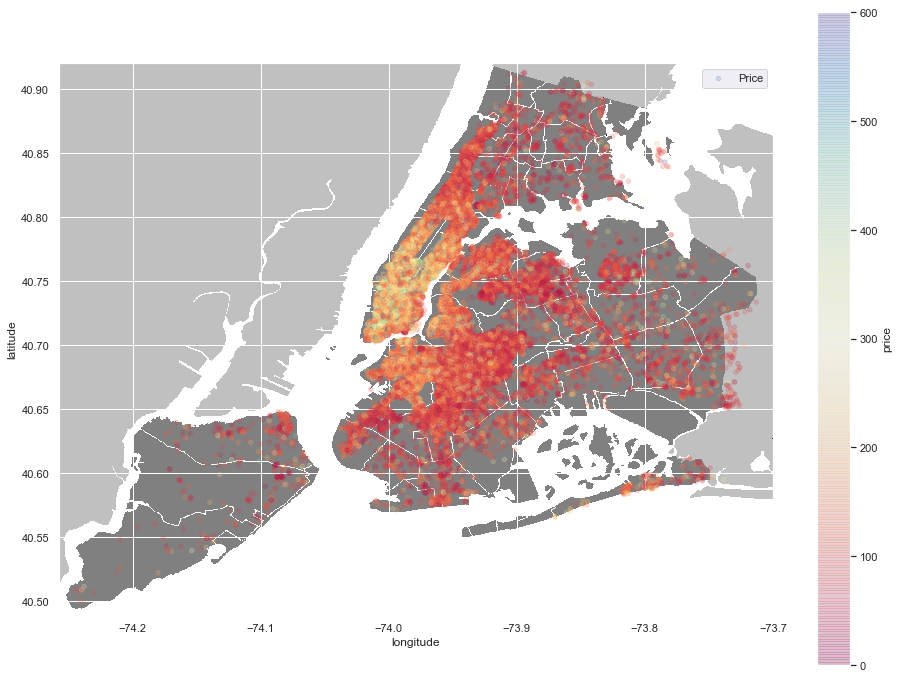

In [31]:
import urllib

plt.figure(figsize=(16,12))

# Using the finding from the violin plot, want to only include prices that make the most sense.
data_cmap = data[data['price'] <= 600]

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

data_cmap.plot(kind='scatter', x='longitude', y='latitude', label='Price', c='price', ax=ax, cmap=plt.get_cmap('Spectral'), colorbar=True, alpha=0.2, zorder=5)
plt.legend()
plt.show()

## Using folium to create an interactive map with defined attributes.

In [32]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins

base_map=folium.Map([40.693943, -73.985880],zoom_start=12)

base_map_rooms=plugins.MarkerCluster().add_to(base_map)

max_price = 90

min_reviews = 15

roomtype = 'Private room'

borough = 'Manhattan'

map_data = data[(data['price'] <= max_price) & (data['number_of_reviews'] >= min_reviews) & (data['room_type'] == roomtype) & (data['neighbourhood_group'] == borough)]

for lat,lon,pr in zip(map_data.latitude,map_data.longitude,map_data.price):
    folium.Marker(location=[lat,lon],icon=folium.Icon(color='red', icon='info-sign'),popup=('$'+ str(pr))).add_to(base_map_rooms)
base_map.add_child(base_map_rooms)

base_map